# Basic notebook for benchmarking tribus results

## Imports

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

## Change these parameters

In [46]:
sample_name = 'tma_cores'
date = '2022-06-01_14-34'
level = 'Global'

## Get the input data

### File paths

In [47]:
sample_path = f'../tests/{sample_name}/quantification/'
cell_type_path = f'../tests/{sample_name}/cell_type_calling/cell_type_descriptions.xlsx'
labels_path = f'../tests/{sample_name}/cell_type_calling/{date}/'

### Read files

In [48]:
cell_type_description = pd.read_excel(cell_type_path, sheet_name=level)
markers = cell_type_description['Marker']

In [49]:
samples = [f for f in listdir(sample_path) if isfile(join(sample_path, f))]
#TODO skip hidden files while iterate through the folder

In [50]:
all_samples = []
all_markers = []
filtered_samples = []
cell_type_subsets = []
cell_type_subsets_filtered = []
all_cell_types = []
for sample in samples:
    #reading the sample and the result file
    sample_file = pd.read_csv(sample_path + sample)
    labels = pd.read_csv(f'{labels_path}/labels_{sample}')

    #filtering the sample file by used markers and use the result in the sample dataframe
    filtered_sample = sample_file[markers]
    filtered_sample['labels'] = labels
    sample_file['labels'] = labels

    #add the sample into the samples list
    all_markers.append(list(sample_file.columns)[4:-11])
    all_samples.append(sample_file)
    filtered_samples.append(filtered_sample)

    #subsetting the sample by cell types (labels)
    subsets_all_marker = []
    subsets_filtered = []
    cell_types = list(np.unique(labels))
    for cell_type in cell_types:
        subsets_all_marker.append(sample_file.loc[sample_file['labels'] == cell_type])
        subsets_filtered.append(filtered_sample.loc[filtered_sample['labels'] == cell_type])

    cell_type_subsets.append(subsets_all_marker)
    cell_type_subsets_filtered.append(subsets_filtered)
    all_cell_types.append(cell_types)

/var/folders/72/g5z28hn52b9ctj3tj0b7xp0c0000gn/T/ipykernel_28817/1181860564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sample['labels'] = labels
/var/folders/72/g5z28hn52b9ctj3tj0b7xp0c0000gn/T/ipykernel_28817/1181860564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sample['labels'] = labels
/var/folders/72/g5z28hn52b9ctj3tj0b7xp0c0000gn/T/ipykernel_28817/1181860564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

## Correlation matrices

In [51]:
def get_correlation_matrix(table, markers):
    correlation_mx = pd.DataFrame()
    for marker1 in markers:
        correlations = []
        for marker2 in markers:
            correlations.append(np.corrcoef(list(table[marker1]), list(table[marker2]))[0, 1])
        correlation_mx[marker1] = correlations
    correlation_mx.index = markers
    return correlation_mx

In [52]:
def vis_corr_mx_one_sample(sample, subsets, markers, cell_types, sample_name):
    whole_sample_corr_mx = get_correlation_matrix(sample, markers)
    clustermap = sns.clustermap(whole_sample_corr_mx, figsize=(10, 10), cmap='vlag').fig.suptitle(
        f'Whole sample correlation {sample_name}', fontweight="bold", y=1.01)

    corr_matrices = []
    for table in subsets:
        corr_matrices.append(get_correlation_matrix(table, markers))

    for i in range(len(corr_matrices)):
        clustermap = sns.clustermap(corr_matrices[i], figsize=(10, 10), cmap='vlag').fig.suptitle(f'{cell_types[i]} {sample_name}',fontweight="bold",y=1.01)

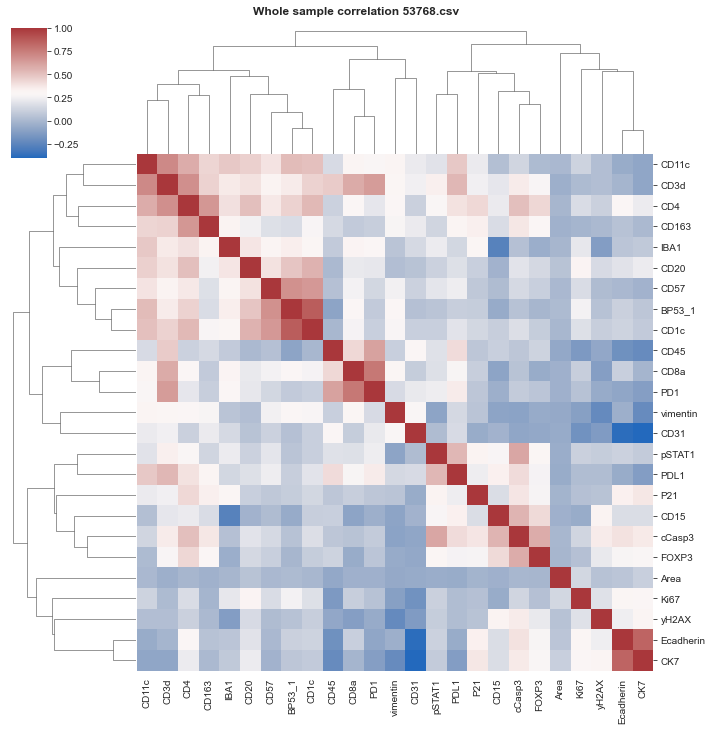

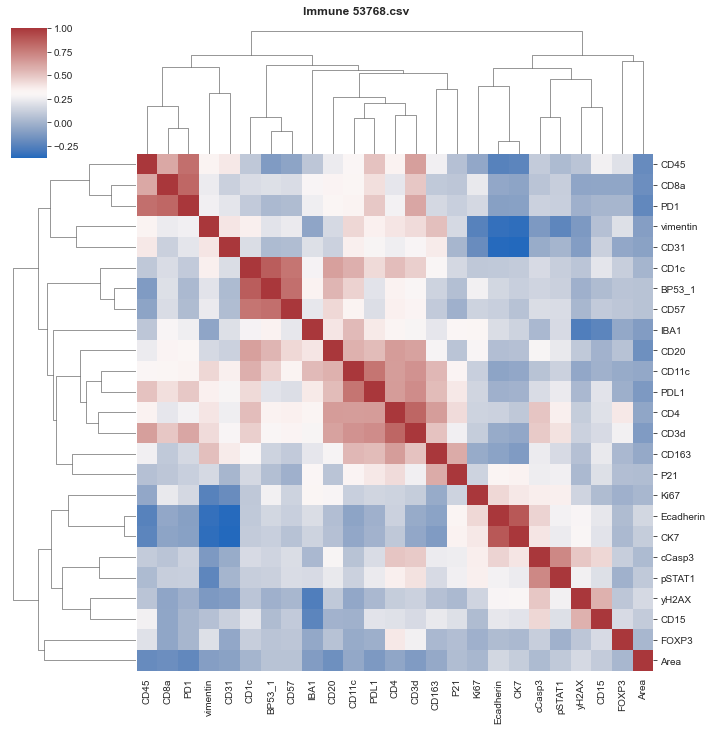

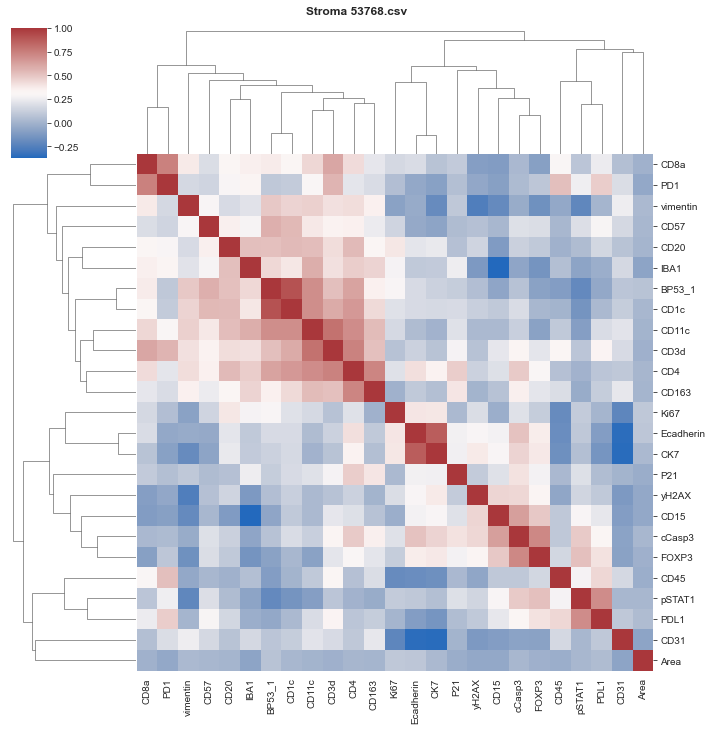

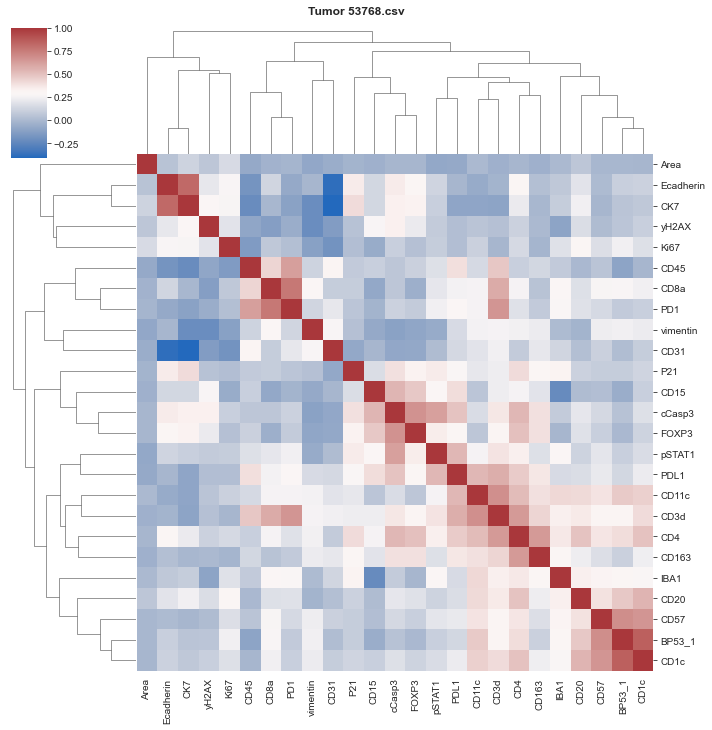

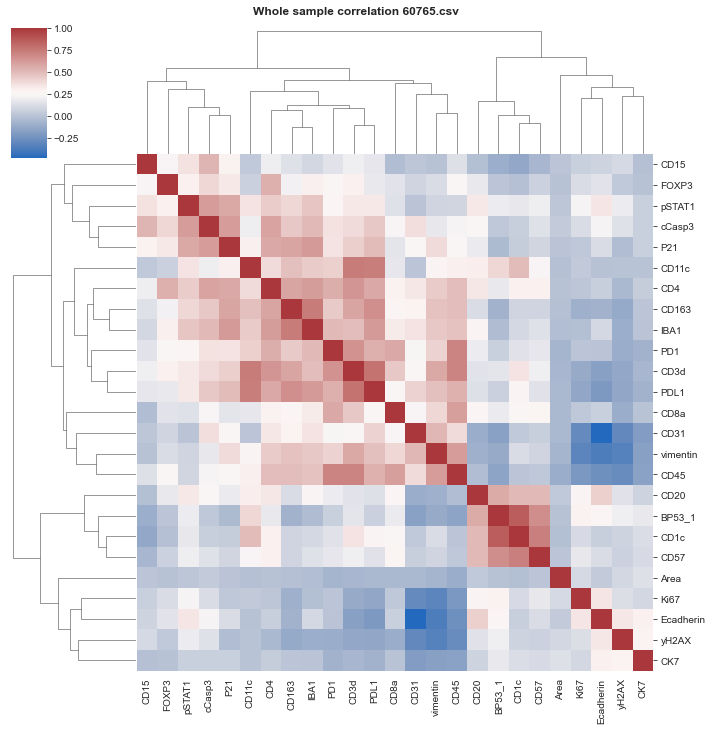

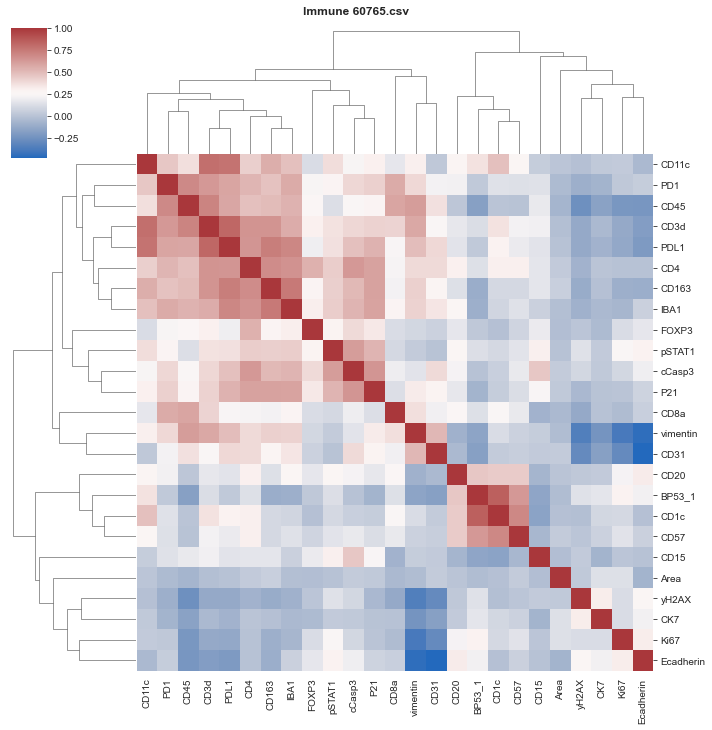

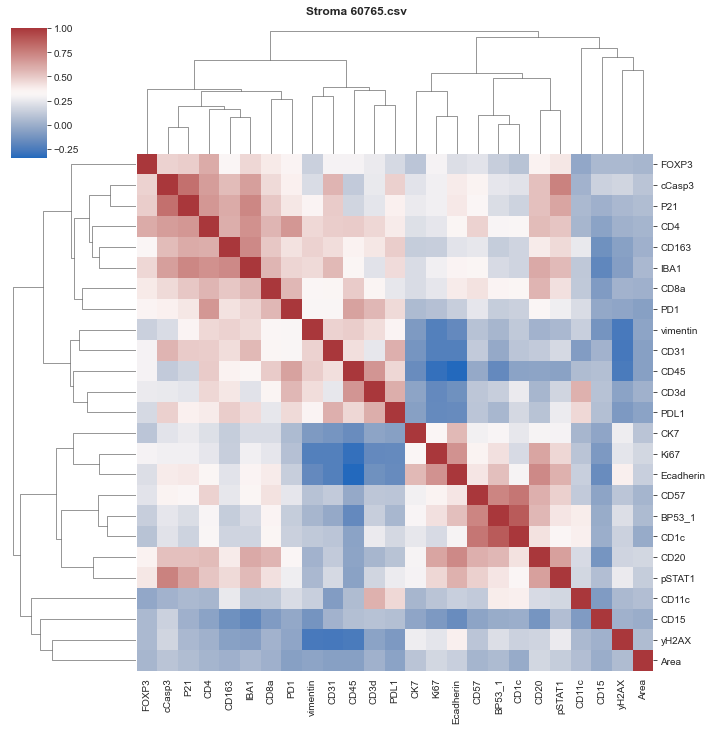

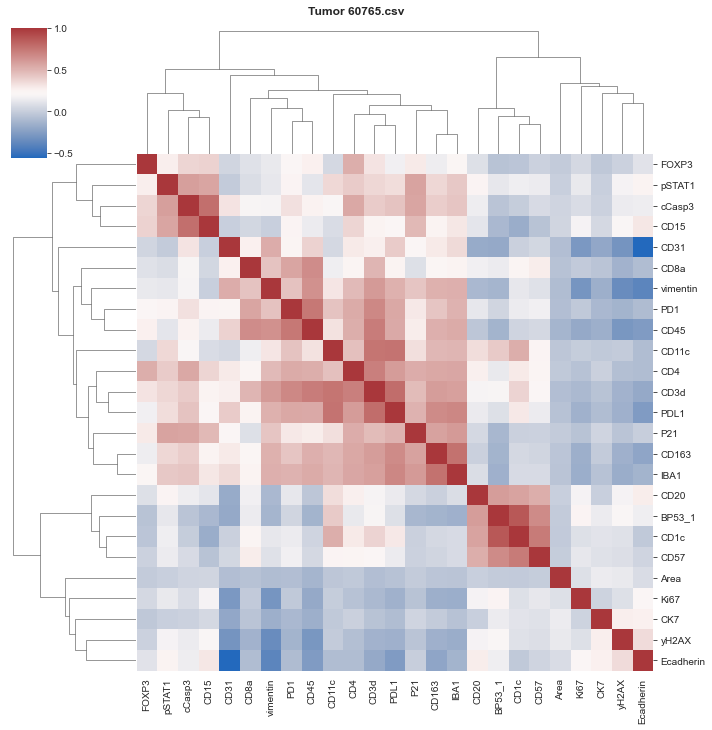

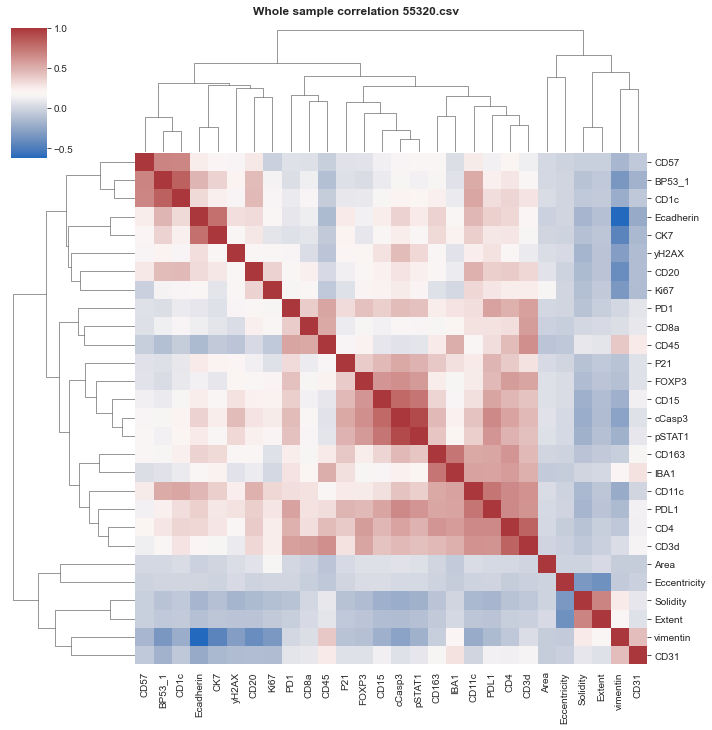

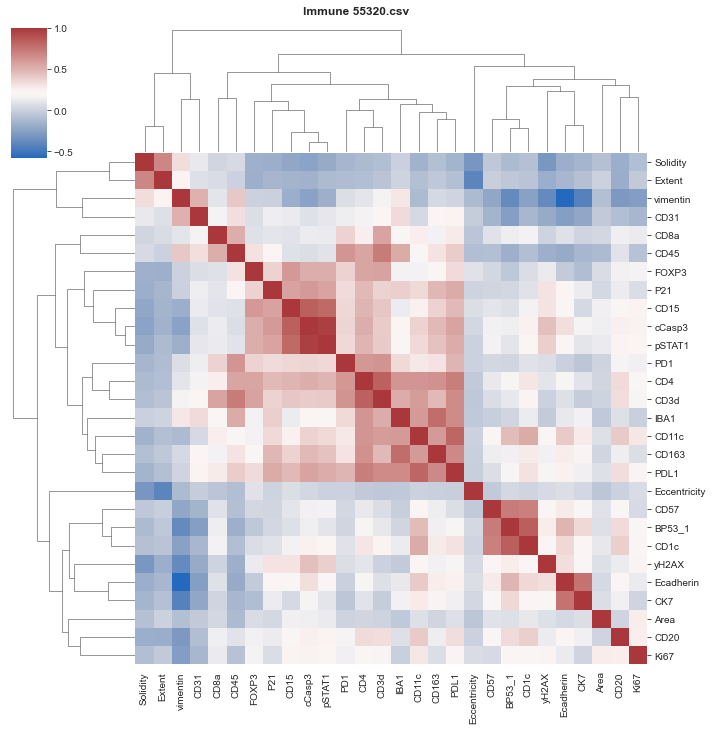

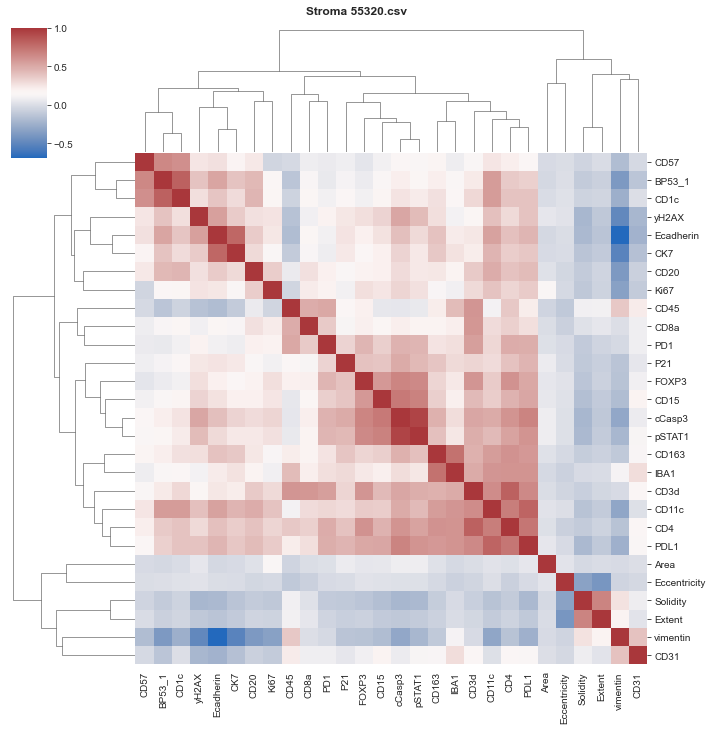

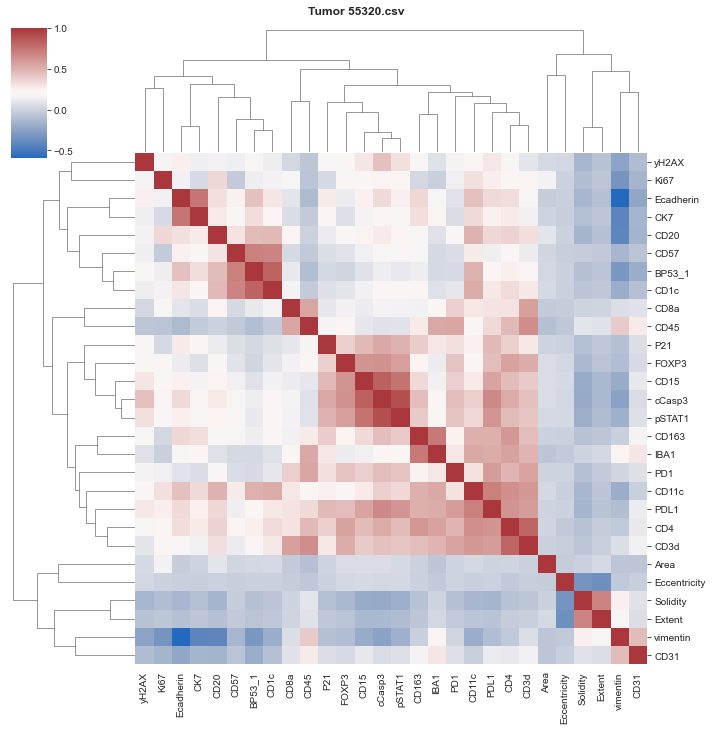

In [53]:
for i in range(len(all_samples)):
    vis_corr_mx_one_sample(all_samples[i], cell_type_subsets[i], all_markers[i], all_cell_types[i], samples[i])